# Face-Mask Detection Project

## Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## Read csv

In [2]:
mask = pd.read_csv('mask.csv')

## Check out .info() and .head()

In [3]:
mask.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 9181 entries, 0 to 9180
dtypes: float64(9180), int64(1)
memory usage: 70.0 MB


In [4]:
mask.head()

,0,1,2,3,4,5,6,7,8,9,...,9171,9172,9173,9174,9175,9176,9177,9178,9179,9180
0,0.019729,0.0,0.000000,0.0,0.374858,0.0,0.0,0.0,0.224950,0.218656,...,0.305085,0.0,0.0,0.0,0.097073,0.0,0.0,0.0,0.306970,0
1,0.357632,0.0,0.000000,0.0,0.040487,0.0,0.0,0.0,0.425324,0.216824,...,0.254187,0.0,0.0,0.0,0.061355,0.0,0.0,0.0,0.211999,0
2,0.217539,0.0,0.000000,0.0,0.174031,0.0,0.0,0.0,0.000000,0.188533,...,0.646282,0.0,0.0,0.0,0.020005,0.0,0.0,0.0,0.000000,0
3,0.496119,0.0,0.000000,0.0,0.035437,0.0,0.0,0.0,0.456059,0.132889,...,0.546041,0.0,0.0,0.0,0.167156,0.0,0.0,0.0,0.485039,0
4,0.047158,0.0,0.211482,0.0,0.000000,0.0,0.0,0.0,0.000000,0.644492,...,0.231750,0.0,0.0,0.0,0.073739,0.0,0.0,0.0,0.320382,0


## Rename the last column with 'Target Class' tag
This column contains the label for each class

In [5]:
mask.columns = [*mask.columns[:-1], 'Target Class']

In [8]:
mask

,0,1,2,3,4,5,6,7,8,9,...,9171,9172,9173,9174,9175,9176,9177,9178,9179,Target Class
0,0.019729,0.0,0.000000,0.0,0.374858,0.0,0.0,0.000000,0.224950,0.218656,...,0.305085,0.0,0.0,0.0,0.097073,0.0,0.0,0.0,0.306970,0
1,0.357632,0.0,0.000000,0.0,0.040487,0.0,0.0,0.000000,0.425324,0.216824,...,0.254187,0.0,0.0,0.0,0.061355,0.0,0.0,0.0,0.211999,0
2,0.217539,0.0,0.000000,0.0,0.174031,0.0,0.0,0.000000,0.000000,0.188533,...,0.646282,0.0,0.0,0.0,0.020005,0.0,0.0,0.0,0.000000,0
3,0.496119,0.0,0.000000,0.0,0.035437,0.0,0.0,0.000000,0.456059,0.132889,...,0.546041,0.0,0.0,0.0,0.167156,0.0,0.0,0.0,0.485039,0
4,0.047158,0.0,0.211482,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.644492,...,0.231750,0.0,0.0,0.0,0.073739,0.0,0.0,0.0,0.320382,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.100331,0.0,0.000000,0.0,0.000000,0.0,0.0,0.121282,0.000000,0.322805,...,0.181932,0.0,0.0,0.0,0.011865,0.0,0.0,0.0,0.186055,1
996,0.730741,0.0,0.000000,0.0,0.041010,0.0,0.0,0.000000,0.000000,0.113918,...,0.018843,0.0,0.0,0.0,0.005384,0.0,0.0,0.0,0.094560,1
997,0.672910,0.0,0.000000,0.0,0.044355,0.0,0.0,0.000000,0.000000,0.014785,...,0.071811,0.0,0.0,0.0,0.006680,0.0,0.0,0.0,0.000000,1
998,0.411037,0.0,0.000000,0.0,0.057324,0.0,0.0,0.000000,0.000000,0.038216,...,0.238684,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.254207,1


## Scatter Plot 2-D
In this scatter plot the classes 'No-Mask' and 'Mask' are compared between each other

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [13]:
pca.fit(mask.drop('Target Class', axis=1))

PCA(n_components=2)

In [16]:
x_pca = pca.transform(mask.drop('Target Class',axis=1))

In [18]:
x_pca

array([[-1.34832832,  0.8501447 ],
       [-2.12211065,  0.95231794],
       [-1.82431268,  1.76950637],
       ...,
       [ 6.31646385, -0.22329274],
       [ 6.5883037 , -0.08136559],
       [ 6.19172942, -0.38123033]])

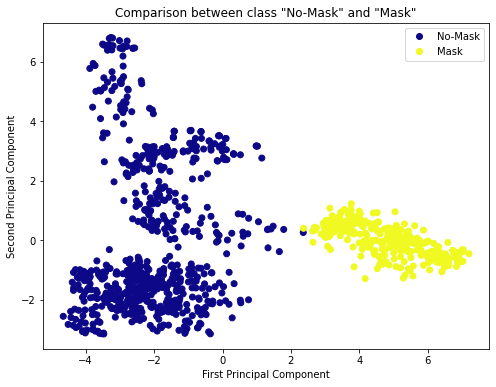

In [19]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(x_pca[:,0],x_pca[:,1],c=mask['Target Class'], cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Comparison between class "No-Mask" and "Mask"')
plt.legend(handles=scatter.legend_elements()[0], labels=['No-Mask','Mask'])

## Standardize Data for more consistent classification

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
scaler.fit(mask.drop('Target Class', axis=1))

StandardScaler()

In [22]:
scaled_data = scaler.transform(mask.drop('Target Class',axis=1))

In [23]:
df_feat = pd.DataFrame(scaled_data, columns=mask.columns[:-1])
df_feat

,0,1,2,3,4,5,6,7,8,9,...,9170,9171,9172,9173,9174,9175,9176,9177,9178,9179
0,-1.171731,-0.264262,-0.216315,-0.17881,2.456983,-0.151299,-0.165109,-0.282712,1.186884,-0.676635,...,2.288888,0.543332,-0.328349,-0.311097,-0.270135,-0.325479,-0.22209,-0.198505,-0.239018,3.526445
1,0.581332,-0.264262,-0.216315,-0.17881,-0.411229,-0.151299,-0.165109,-0.282712,2.727002,-0.686520,...,-0.392879,0.280759,-0.328349,-0.311097,-0.270135,-0.539239,-0.22209,-0.198505,-0.239018,2.341545
2,-0.145482,-0.264262,-0.216315,-0.17881,0.734302,-0.151299,-0.165109,-0.282712,-0.542127,-0.839190,...,-0.392879,2.303504,-0.328349,-0.311097,-0.270135,-0.786717,-0.22209,-0.198505,-0.239018,-0.303432
3,1.299816,-0.264262,-0.216315,-0.17881,-0.454543,-0.151299,-0.165109,-0.282712,2.963240,-1.139469,...,-0.392879,1.786382,-0.328349,-0.311097,-0.270135,0.093955,-0.22209,-0.198505,-0.239018,5.748100
4,-1.029430,-0.264262,2.767512,-0.17881,-0.758520,-0.151299,-0.165109,-0.282712,-0.542127,1.621350,...,0.803163,0.165010,-0.328349,-0.311097,-0.270135,-0.465128,-0.22209,-0.198505,-0.239018,3.693772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.753563,-0.264262,-0.216315,-0.17881,-0.758520,-0.151299,-0.165109,1.753186,-0.542127,-0.114606,...,-0.392879,-0.091994,-0.328349,-0.311097,-0.270135,-0.835430,-0.22209,-0.198505,-0.239018,2.017858
996,2.517051,-0.264262,-0.216315,-0.17881,-0.406737,-0.151299,-0.165109,-0.282712,-0.542127,-1.241848,...,-0.392879,-0.933339,-0.328349,-0.311097,-0.270135,-0.874220,-0.22209,-0.198505,-0.239018,0.876328
997,2.217018,-0.264262,-0.216315,-0.17881,-0.378046,-0.151299,-0.165109,-0.282712,-0.542127,-1.776808,...,-0.392879,-0.660085,-0.328349,-0.311097,-0.270135,-0.866461,-0.22209,-0.198505,-0.239018,-0.303432
998,0.858403,-0.264262,-0.216315,-0.17881,-0.266801,-0.151299,-0.165109,-0.282712,-0.542127,-1.650366,...,-0.392879,0.200783,-0.328349,-0.311097,-0.270135,-0.906440,-0.22209,-0.198505,-0.239018,2.868146


## PCA Decomposition
PCA is used to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot.

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [25]:
pca.fit(scaled_data)

PCA(n_components=2)

In [26]:
x_pca = pca.transform(scaled_data)

In [27]:
scaled_data.shape

(1000, 9180)

In [28]:
x_pca.shape

(1000, 2)

## Scatter Plot 2-D
In this scatter plot the classes 'No-Mask' and 'Mask' are compared between each other

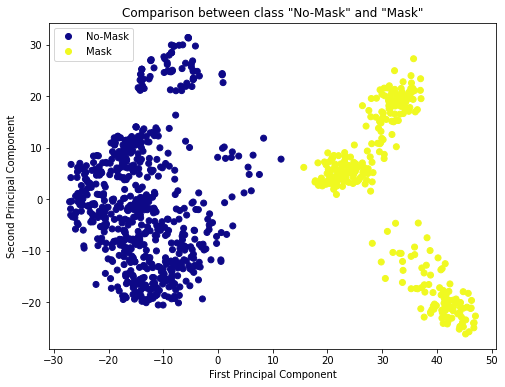

In [29]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(x_pca[:,0],x_pca[:,1],c=mask['Target Class'], cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Comparison between class "No-Mask" and "Mask"')
plt.legend(handles=scatter.legend_elements()[0], labels=['No-Mask','Mask'])

## Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X=x_pca
y=mask['Target Class']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## GridSearch
GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested. 

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

In [21]:
param_grid = {'C': [1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,100000,1e6,1e7,1e8,1e9]} 

In [22]:
grid = GridSearchCV(LinearSVC(max_iter=50000),param_grid,refit=True,verbose=3)

In [23]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV 1/5] END ...........................C=1e-09;, score=0.986 total time=   0.0s
[CV 2/5] END ...........................C=1e-09;, score=0.986 total time=   0.0s
[CV 3/5] END ...........................C=1e-09;, score=0.964 total time=   0.0s
[CV 4/5] END ...........................C=1e-09;, score=0.964 total time=   0.0s
[CV 5/5] END ...........................C=1e-09;, score=0.971 total time=   0.0s
[CV 1/5] END ...........................C=1e-08;, score=0.986 total time=   0.0s
[CV 2/5] END ...........................C=1e-08;, score=0.986 total time=   0.0s
[CV 3/5] END ...........................C=1e-08;, score=0.964 total time=   0.0s
[CV 4/5] END ...........................C=1e-08;, score=0.964 total time=   0.0s
[CV 5/5] END ...........................C=1e-08;, score=0.971 total time=   0.0s
[CV 1/5] END ...........................C=1e-07;, score=0.986 total time=   0.0s
[CV 2/5] END ...........................C=1e-07;

GridSearchCV(estimator=LinearSVC(max_iter=50000),
             param_grid={'C': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                               0.01, 0.1, 1, 10, 100, 1000, 10000, 100000,
                               1000000.0, 10000000.0, 100000000.0,
                               1000000000.0]},
             verbose=3)

In [24]:
grid.best_params_

{'C': 0.1}

In [25]:
grid.best_score_

1.0

## Train the Support Vector Classifier

In [35]:
svm = LinearSVC(C=0.1, random_state=42)

In [40]:
svm.fit(X_train, y_train.values)

LinearSVC(C=0.1, random_state=42)

## Predictions and Evaluations

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
predictions = svm.predict(X_test)

In [43]:
print(confusion_matrix(y_test,predictions))

[[212   1]
 [  0  87]]


In [44]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       0.99      1.00      0.99        87

    accuracy                           1.00       300
   macro avg       0.99      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



## Hyperplane Plot

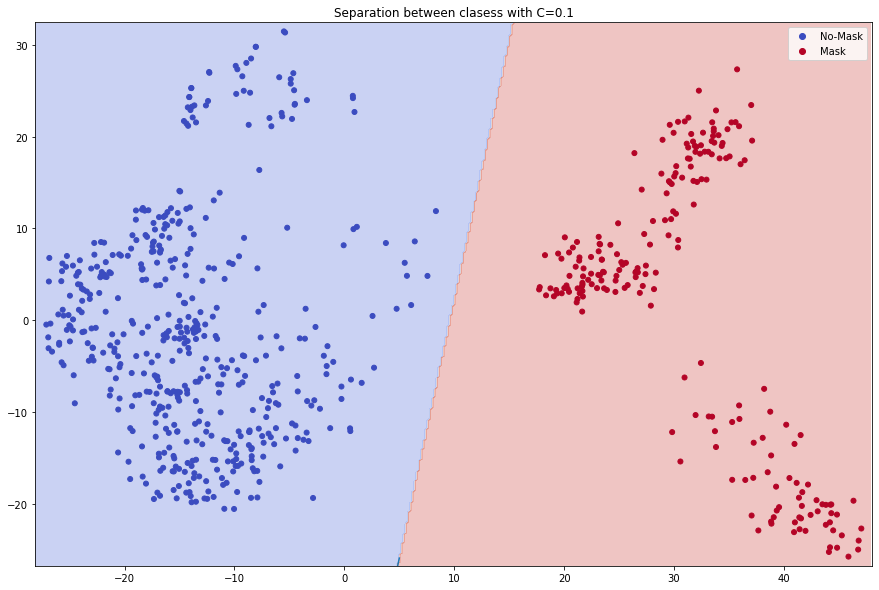

In [45]:
fig, ax = plt.subplots()
# get the separating hyperplane
w = svm.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (svm.intercept_[0]) / w[1]

# create a mesh to plot in
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                     np.arange(y_min, y_max, .2))
Z = svm.predict(np.c_[xx2.ravel(), yy2.ravel()])

Z = Z.reshape(xx2.shape)
ax.contourf(xx2, yy2, Z, cmap=plt.cm.coolwarm, alpha=0.3)
scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=25)
ax.plot(xx,yy)

ax.axis([x_min, x_max,y_min, y_max])
plt.title('Separation between clasess with C=0.1')
fig.set_size_inches(15,10)
plt.legend(handles=scatter.legend_elements()[0], labels=['No-Mask','Mask'])
plt.show()

## Save Model

In [46]:
import joblib

In [47]:
joblib.dump(svm, 'face_mask.xml')

['face_mask.xml']